<a href="https://colab.research.google.com/github/TarfaGaida/Cancelation-Hotel-Booking-analysis-and-predictive-model/blob/main/Study_Case_Hotel_Cancellation_booking_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Load Library

In [ ]:
!pip install dalex
!pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=f40f18ce745dfd7bb57f59baac683f19f2581a9b8e216a8f49bf53fc55c31451
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

In [ ]:
# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
#load logisic regression classifier model
from sklearn.linear_model import LogisticRegression
# # load SVM classifier model
# from sklearn.svm import SVC
# # load KNN classifier model
# from sklearn.neighbors import KNeighborsClassifier

# load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Load Dataset

* hotel: Type of hotel (Categorical)

* is_canceled: Whether the booking was canceled or not (Binary)

* lead_time: Number of days between booking date and arrival date (Numeric)

* arrival_date_year: The year of the arrival date (Numeric)

* arrival_date_month: The month of the arrival date (Categorical)

* arrival_date_week_number: The week number of the arrival date (Numeric)

* arrival_date_day_of_month: The day of the month of the arrival date (Numeric)

* stays_in_weekend_nights: Number of weekend nights stayed or booked to stay at the hotel (Numeric)

* stays_in_week_nights: Number of week nights stayed or booked to stay at the hotel (Numeric)

* adults, children, babies: Number of guests categorized by age groups

adults = Number of adults   
children = Number of children   
babies = Number infants   

** Booking Details:   

* meal: Type(s) food option(s) included in booking package (Categorical)
* country & market_segment & distribution_channel columns provide demographic and customer classification information.
* is_repeated_guest column specifies whether a guest is a repeated visitor or not.
* previous_cancellations column indicates how many previous bookings were canceled by a guest.

* previous_bookings_not_canceled shows how many previous bookings were not canceled by a guest.


** Accommodation Details:

* reserved_room_type column indicates which type room was originally reserved for each booking.

* assigned_room_type mentions which type room was finally assigned for each booking.

* booking_changes: Number of changes made to the booking before arrival.

* deposit_type: Type of deposit made for the booking (Categorical).

* agent & company columns provide relevant information about the travel agency and/or company involved in making the reservation.

** Additional Information:

* days_in_waiting_list: Number of days the booking was on a waiting list before it was confirmed or canceled.

* customer_type provides information on types of customers (Categorical)

* adr: Average daily rate per room, calculated by dividing the sum of all lodging transactions by the total number of staying nights (Numeric)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_hotel = pd.read_csv('/content/drive/MyDrive/Data Science/3rd interview/train.csv')
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
# Buat tabel statistik data numerik,
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Variabel", "Mean", "Median", "Mode", "Std. Dev"]

# List kolom yang ingin dihitung
columns = {
    'lead_time': 'hari',
    'adr': '',
    'stays_in_weekend_nights': 'malam',
    'stays_in_week_nights': 'malam',
    'adults': '',
    'children': '',
    'babies': ''
}

for col, satuan in columns.items():
    mean = round(df_hotel[col].mean(), 2)
    median = round(df_hotel[col].median(), 2)
    mode = df_hotel[col].mode()[0]
    std = round(df_hotel[col].std(), 2)

    table.add_row([
        f"{col}",
        f"{mean} {satuan}".strip(),
        f"{median} {satuan}".strip(),
        f"{mode} {satuan}".strip(),
        std
    ])

print(table)

+-------------------------+-------------+-----------+---------+----------+
|         Variabel        |     Mean    |   Median  |   Mode  | Std. Dev |
+-------------------------+-------------+-----------+---------+----------+
|        lead_time        | 103.91 hari | 69.0 hari |  0 hari |  106.87  |
|           adr           |    101.72   |    94.5   |   62.0  |  48.08   |
| stays_in_weekend_nights |  0.93 malam | 1.0 malam | 0 malam |   1.0    |
|   stays_in_week_nights  |  2.5 malam  | 2.0 malam | 2 malam |   1.92   |
|          adults         |     1.85    |    2.0    |    2    |   0.61   |
|         children        |     0.1     |    0.0    |   0.0   |   0.4    |
|          babies         |     0.01    |    0.0    |    0    |   0.1    |
+-------------------------+-------------+-----------+---------+----------+


In [ ]:
df_hotel.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,83293,83293,83293,82947,83293,83293,83293,83293,83293,83293,83293,83293
unique,64,12,5,165,8,5,10,11,3,4,3,914
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-10-21
freq,1373,9643,64424,33952,39445,68368,60062,51702,72979,62535,52516,1024


# Data Cleaning  & Manipulation


In [ ]:
df_hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df_hotel.duplicated().sum()

np.int64(0)

In [ ]:
#handle missing value, drop
#drop column
df_hotel.drop(['company'], axis=1, inplace=True)

In [ ]:
# Cleaning missing values
df_hotel['children'].fillna(0, inplace=True)
df_hotel['country'].fillna(df_hotel['country'].mode()[0], inplace=True)
df_hotel['agent'].fillna(0, inplace=True)


In [ ]:
#re-check missing value
df_hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#isi column kategori
for col in df_hotel.describe(include = 'object').columns:
    print(col)
    print(df_hotel[col].unique())
    print('-'*50)

hotel
['Crystal Cove, Barbados Barbados' 'Greensboro Courtyard Greensboro, NC'
 'The Westin Peachtree Plaza, Atlanta Atlanta, GA '
 'Courtyard by Marriott Aberdeen Airport Aberdeen, United Kingdom'
 'W New York – Union Square New York, NY'
 'Hotel Maria Cristina, San Sebastian San Sebastian, Spain'
 'W New York – Times Square New York, NY'
 'The Ritz-Carlton, Tokyo Tokyo, Japan'
 'Marriott Puerto Vallarta Resort & Spa Puerto Vallarta, Mexico'
 'Las Vegas Marriott Las Vegas, NV '
 'Heidelberg Marriott Hotel Heidelberg, Germany'
 'Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil'
 'Renaissance Hamburg Hotel Hamburg, Germany'
 'The Ritz-Carlton, Berlin Berlin, Germany'
 'Sheraton Lima Hotel & Convention Center Lima, Peru'
 'Courtyard Las Vegas Convention Center Las Vegas, NV '
 'Newark Liberty International Airport Courtyard Newark, NJ'
 'Indianapolis Airport Courtyard Indianapolis, IN'
 'Treasure Beach, Barbados Barbados'
 'Cape Town Marriott Hotel Crystal Towers Cape Town, South

In [ ]:
# Convert to appropriate types
df_hotel['children'] = df_hotel['children'].astype(int)
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'])

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83293 non-null  int64         
 11  ba

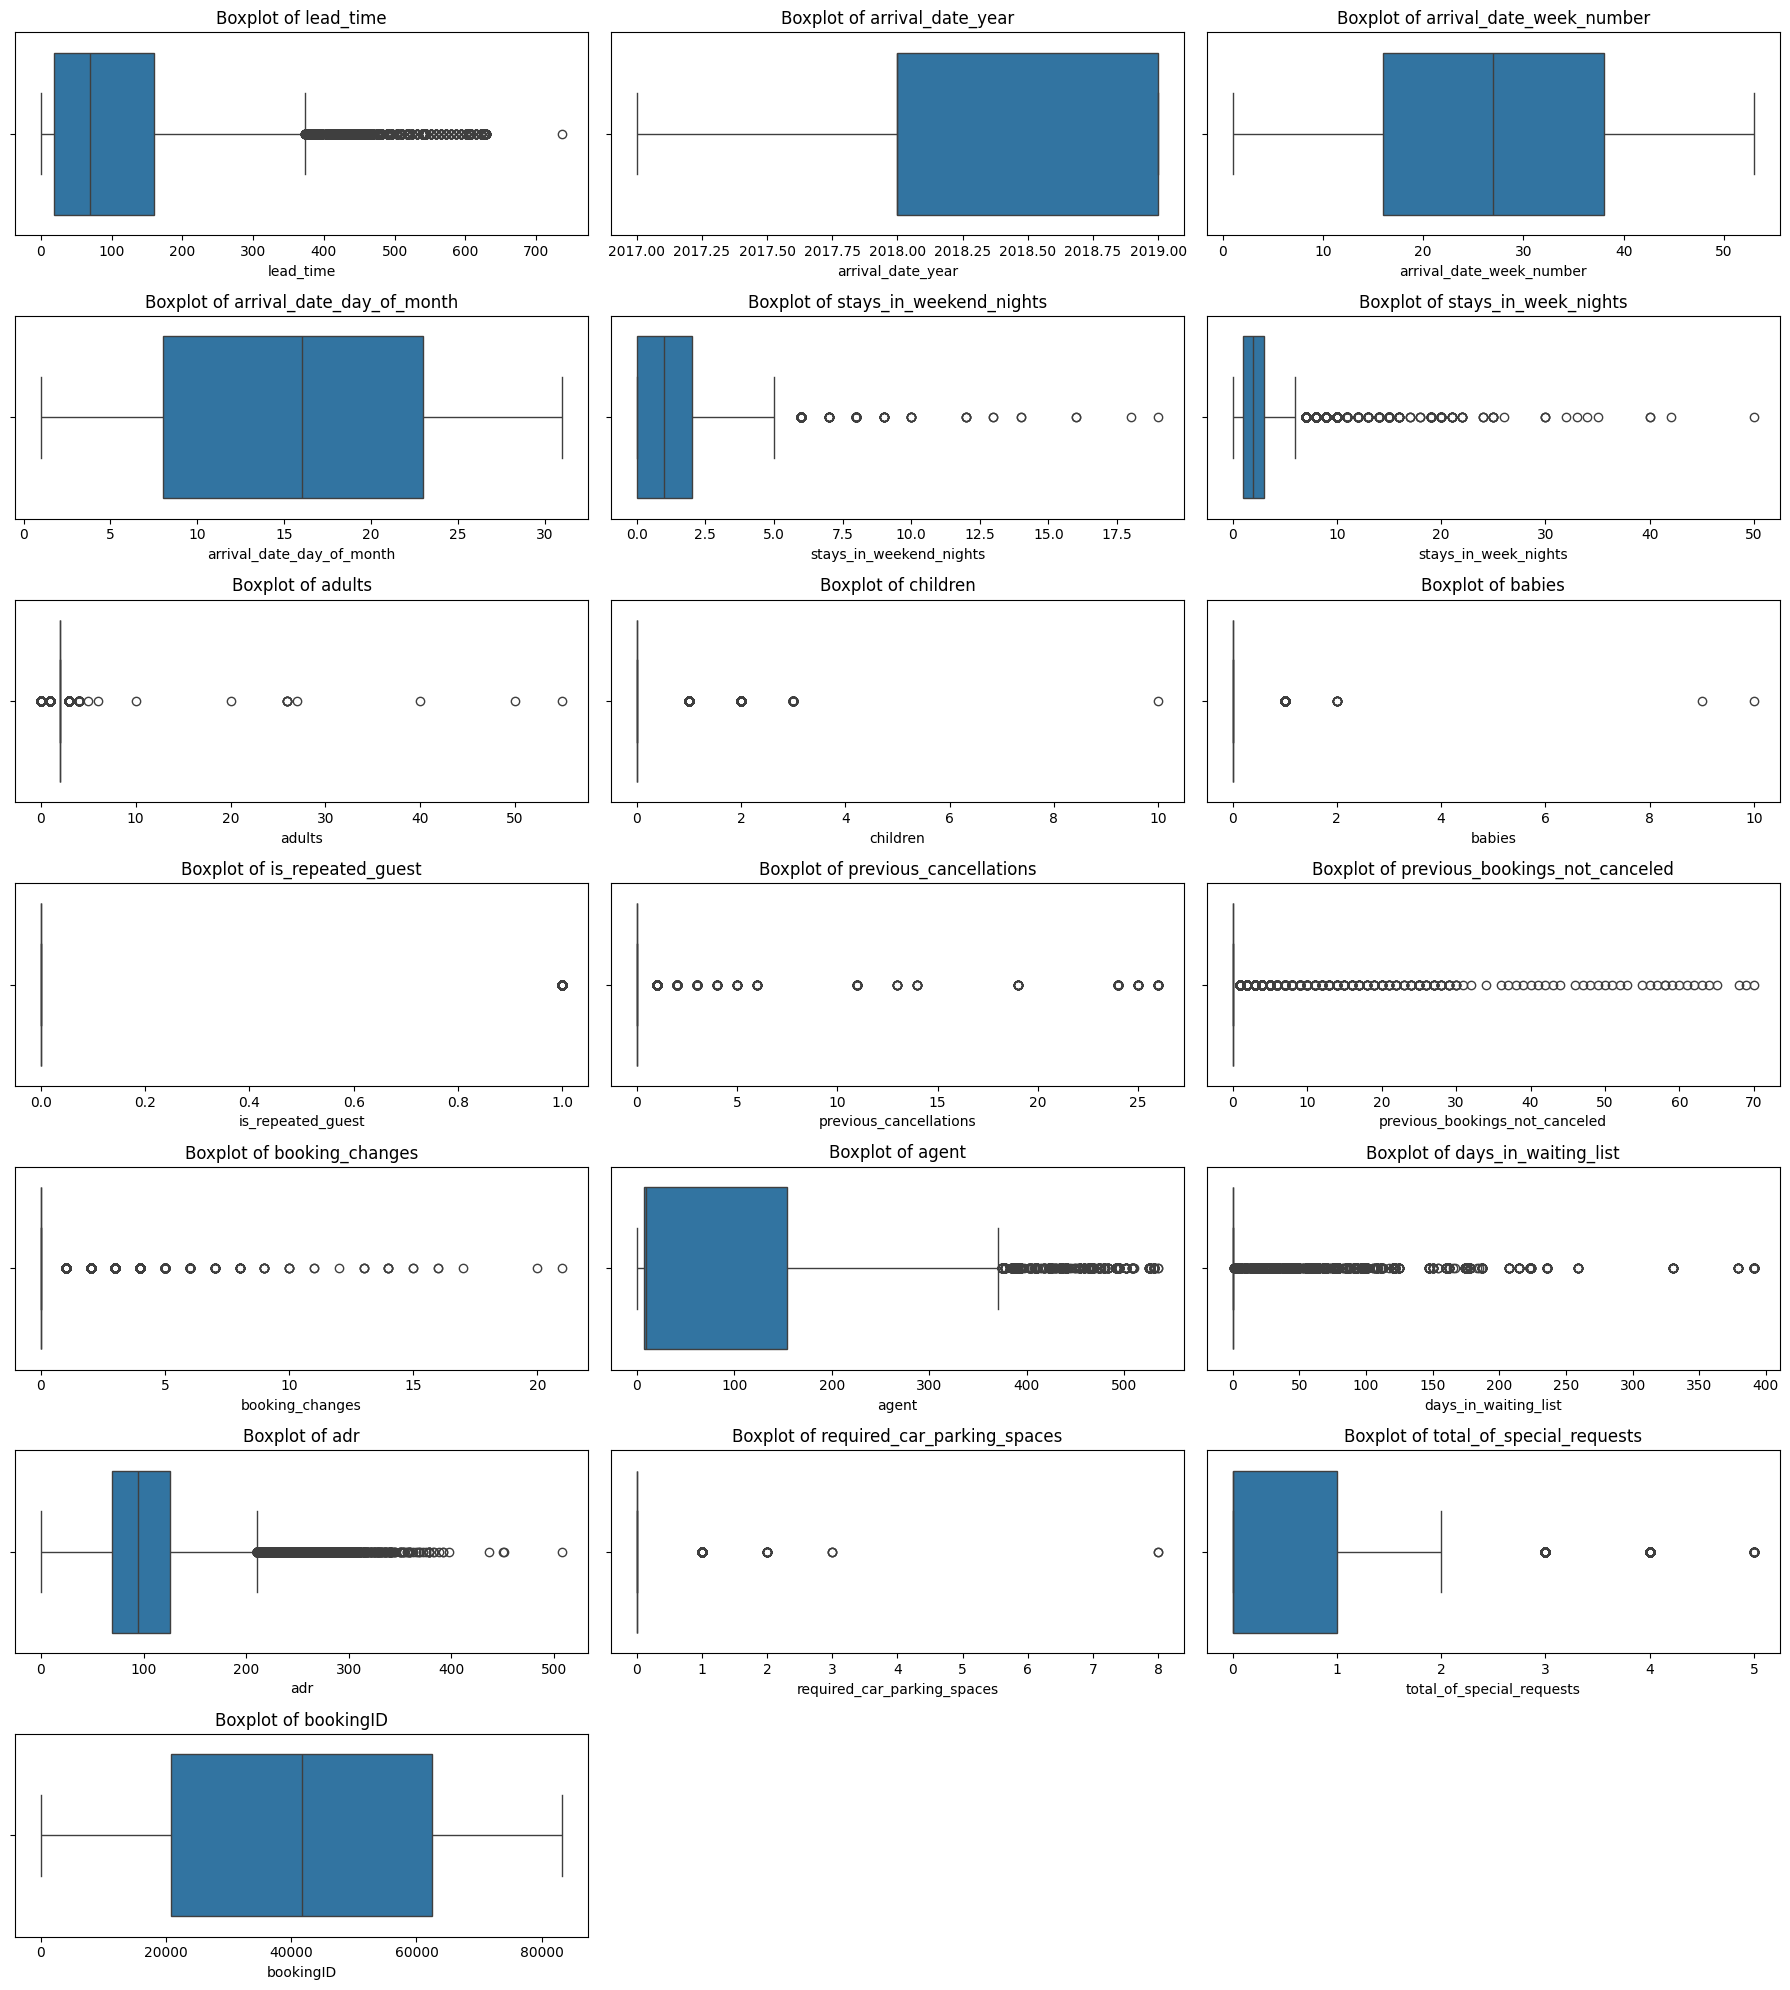

In [ ]:
# numeric column, exept target(cancelation)
num_cols = df_hotel.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'is_canceled']

# Visualisasi outlier with boxplot
plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data=df_hotel, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
df = df_hotel.copy()
# Fitur kontinu yang berpotensi mengandung outlier original_columns = ['lead_time', 'adr']
original_columns = ['lead_time', 'adr']
stay_columns = ['stays_in_weekend_nights', 'stays_in_week_nights']
all_outlier_columns = original_columns + stay_columns

# 3. Log Transform untuk Kolom Skewed
# =========================
# Tambahkan 1 agar log(0) tidak error
df['log_lead_time'] = np.log1p(df['lead_time'])
df['log_adr'] = np.log1p(df['adr'])

# =========================
# 4. Fungsi Remove Outlier Menggunakan IQR
# =========================
def remove_outliers_iqr_multicol(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# 5. Terapkan Outlier Removal
# =========================
# Terapkan IQR hanya untuk kolom log dan kolom menginap
df = remove_outliers_iqr_multicol(df, ['log_lead_time', 'log_adr'] + stay_columns)

# 6. Hapus Kolom Asli Jika Tidak Dibutuhkan

df.drop(['lead_time', 'adr'], axis=1, inplace=True)

# 7. Cek Hasil

print("Jumlah data setelah outlier removal:", df.shape)
print("Contoh data:\n", df.head())


Jumlah data setelah outlier removal: (78841, 32)
Contoh data:
                                                hotel  is_canceled  \
0                    Crystal Cove, Barbados Barbados            0   
1                Greensboro Courtyard Greensboro, NC            1   
2   The Westin Peachtree Plaza, Atlanta Atlanta, GA             1   
3  Courtyard by Marriott Aberdeen Airport Aberdee...            0   
4             W New York – Union Square New York, NY            1   

   arrival_date_year arrival_date_month  arrival_date_week_number  \
0               2019            January                         2   
1               2018           December                        51   
2               2019                May                        20   
3               2018            October                        43   
4               2017          September                        39   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         10

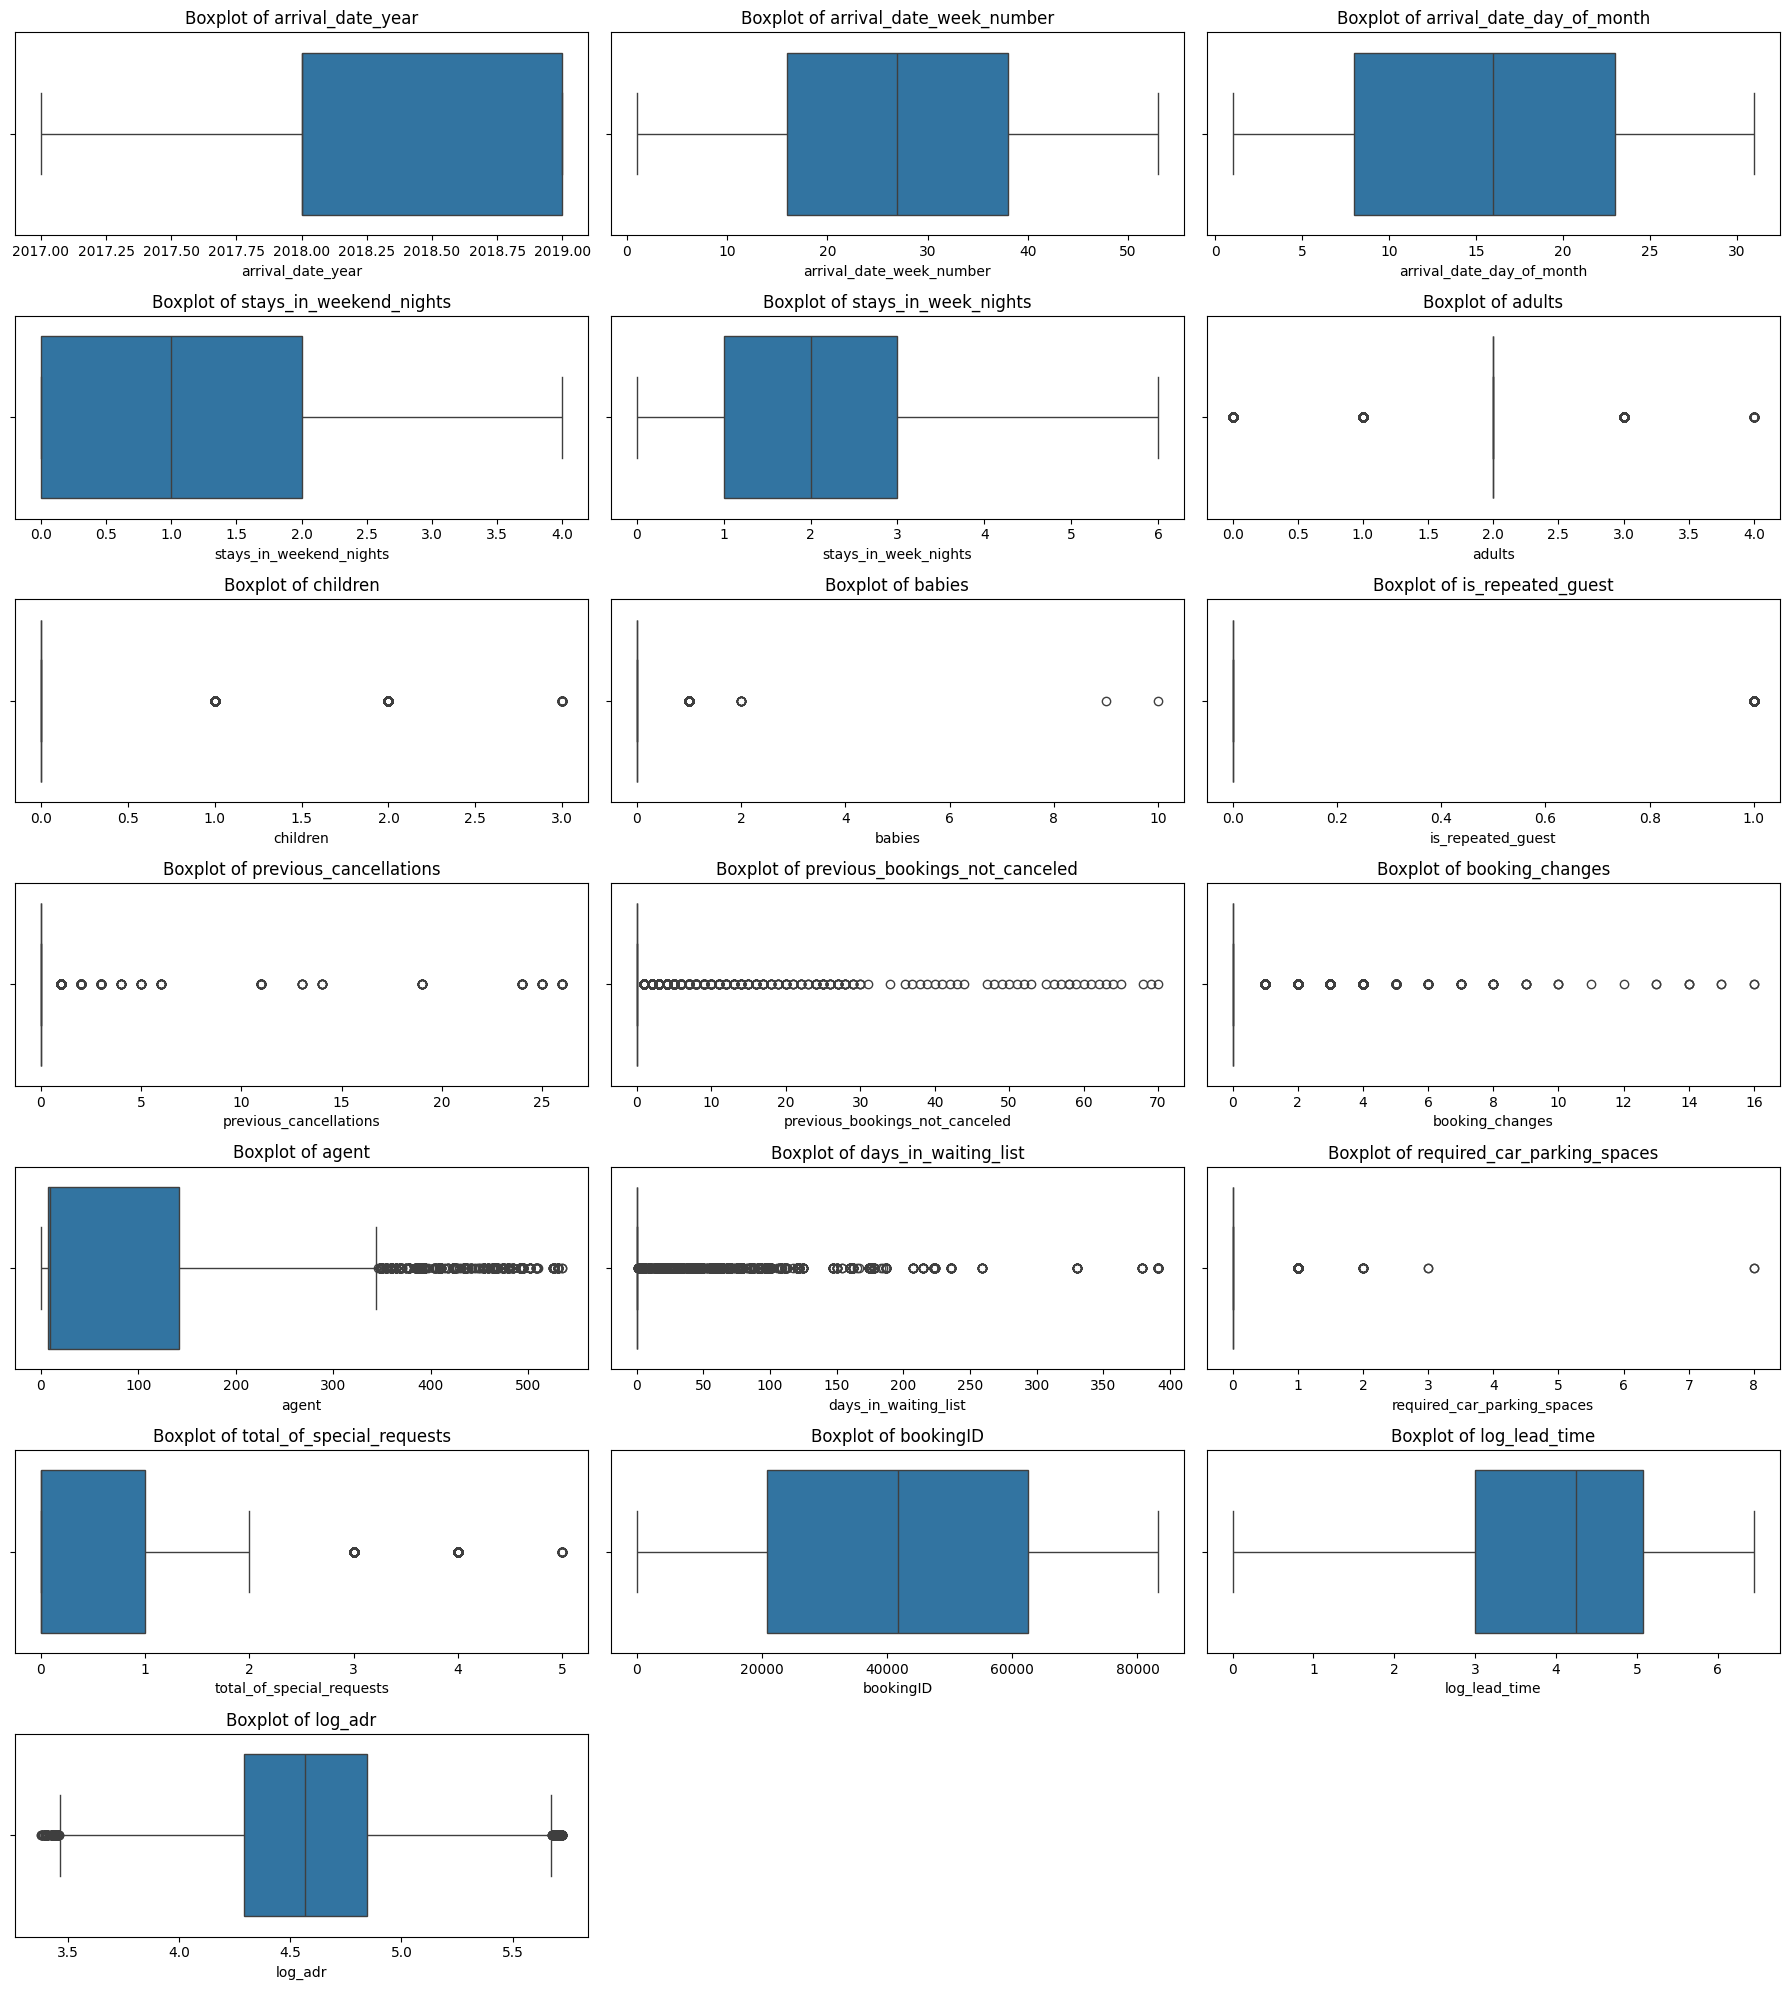

In [ ]:
# numeric column, exept target(cancelation)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'is_canceled']

# Visualisasi outlier with boxplot
plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

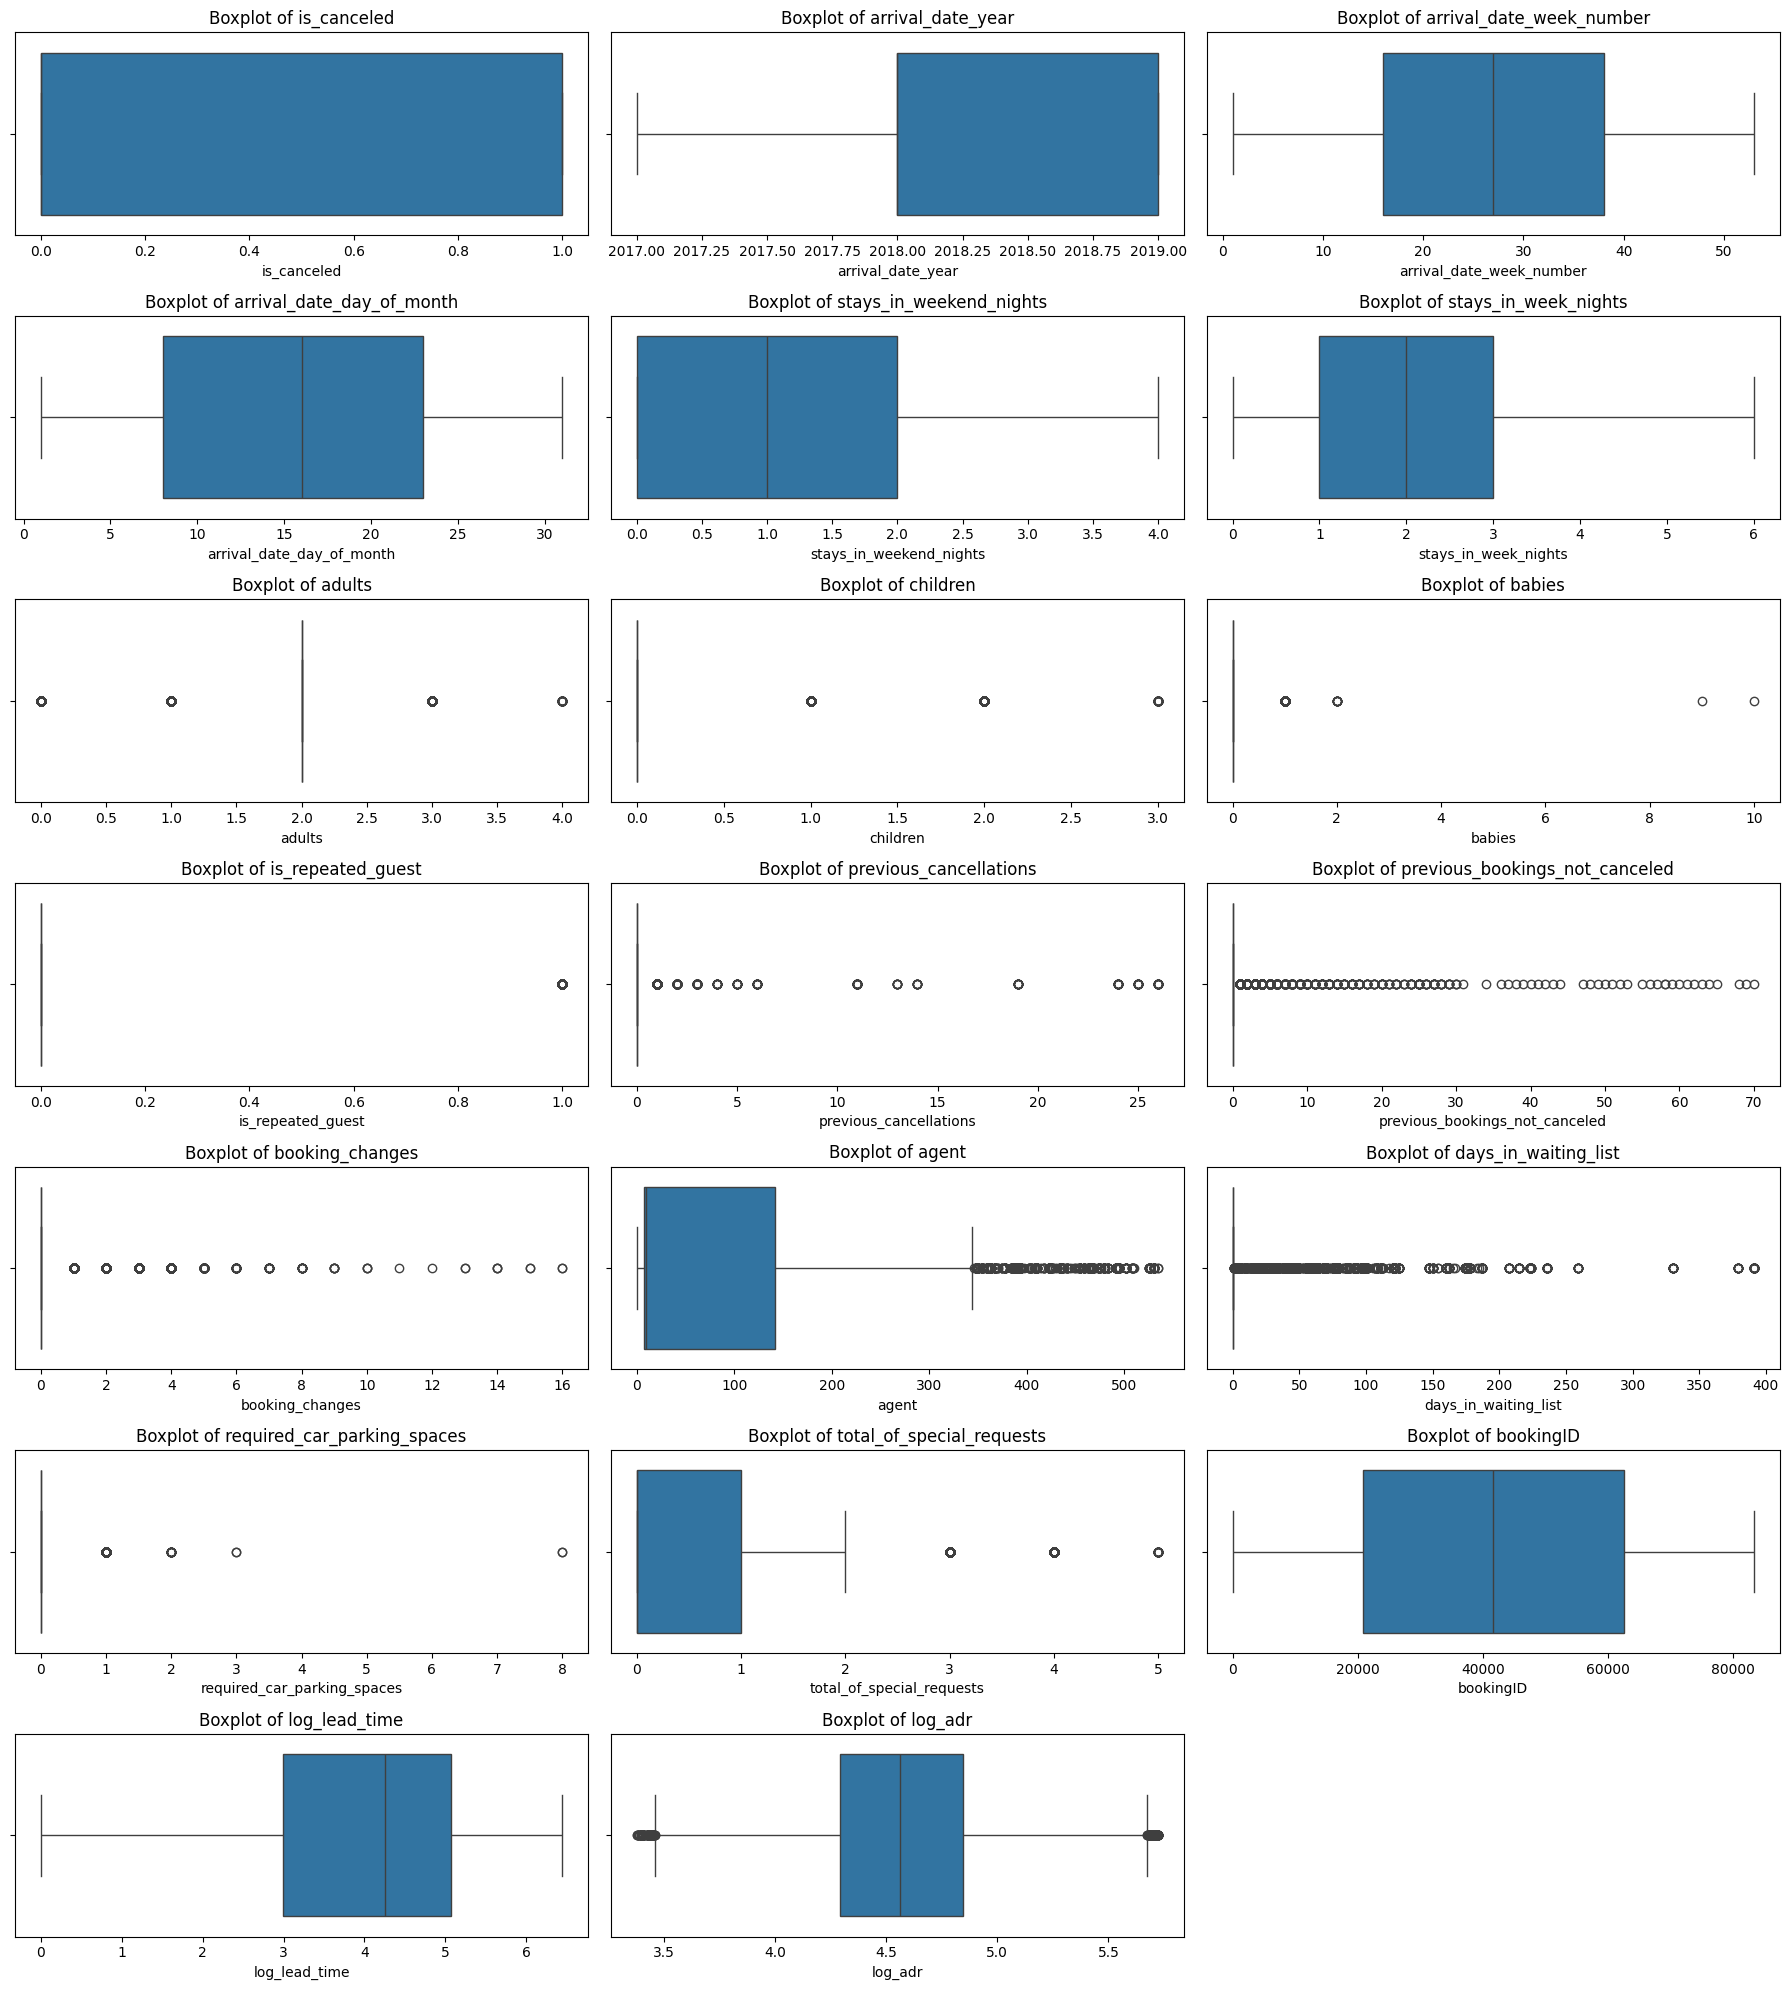

In [ ]:
num_column = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(18, 20))
for i, col in enumerate(num_column):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
df.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,log_lead_time,log_adr
0,"Crystal Cove, Barbados Barbados",0,2019,January,2,10,0,4,2,0,...,314.0,0,Transient,0,0,Check-Out,2019-01-14,1,2.197225,3.673766
1,"Greensboro Courtyard Greensboro, NC",1,2018,December,51,15,0,2,2,0,...,1.0,0,Transient,0,0,Canceled,2017-10-21,2,6.263398,4.155753
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,2019,May,20,19,1,2,2,0,...,12.0,0,Transient,0,0,Canceled,2018-11-25,3,5.170484,4.709530
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,2018,October,43,17,1,0,1,0,...,0.0,0,Transient,0,0,Check-Out,2018-10-18,4,0.000000,3.828641
4,"W New York – Union Square New York, NY",1,2017,September,39,26,2,3,2,0,...,16.0,0,Transient,0,1,Canceled,2017-08-24,5,3.526361,4.076181


# EDA

bisnis question
1. bagaimana percentasi cancelation rate pada hotel-hotel pada data set?
2.  bagaiman acancelation rate berdasarkan tipe pelanggan
4. bagaimana pengaruh waktu lama pemesanan - visit day (lead time) pada cancelation?
5. pelanggan distribution chanel mana yang lebih cenderng melakukan cancelation pesanan kamar
6. apa pengarung deposit pemesanan terhadap pembatalan booking hotel?

is_canceled
0    0.624193
1    0.375807
Name: proportion, dtype: float64


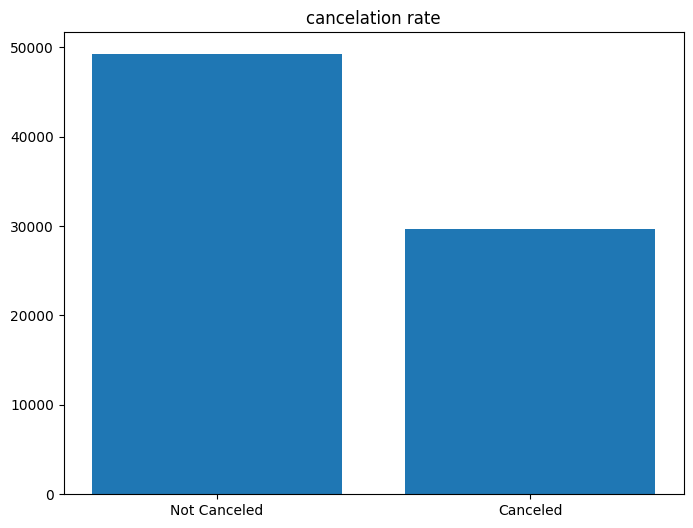

In [ ]:
# 1. percentage of cancellations from 2015 to 2017 and plot a bar graph
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(8,6))
plt.title('cancelation rate')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts())
plt.show()


In [ ]:
#cancelation rate
df['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.624193
1,0.375807


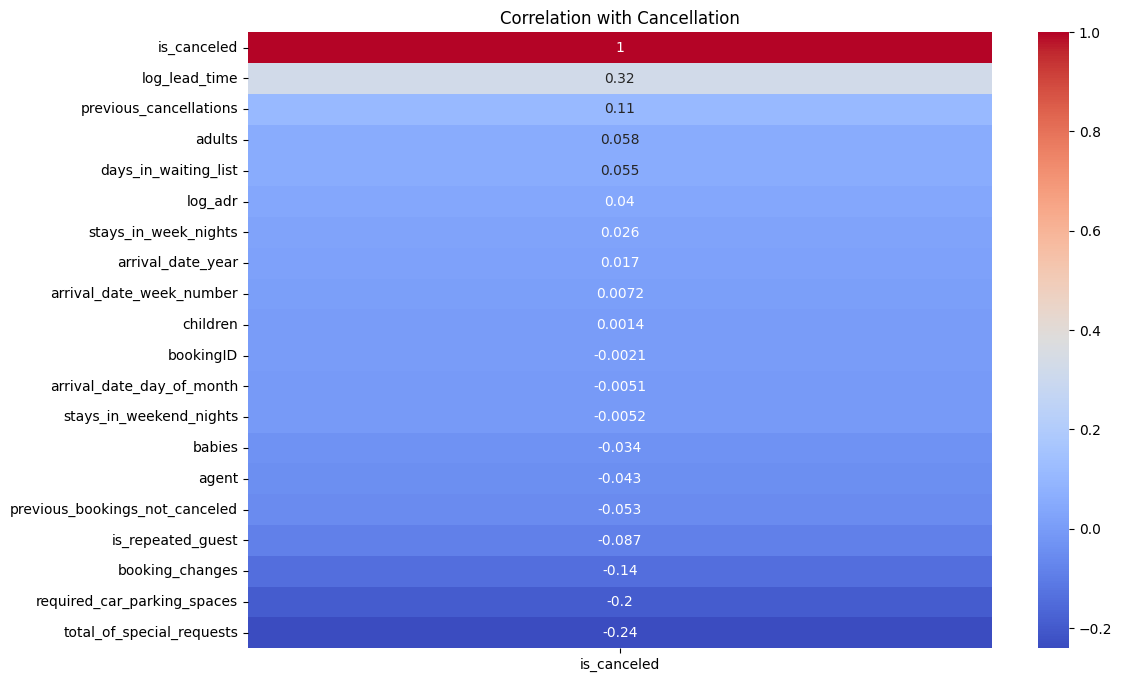

In [ ]:
# Numerical features correlation
numeric_df = df.select_dtypes(include=np.number) # Select only numerical columns
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['is_canceled']].sort_values('is_canceled', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Cancellation')
plt.show()

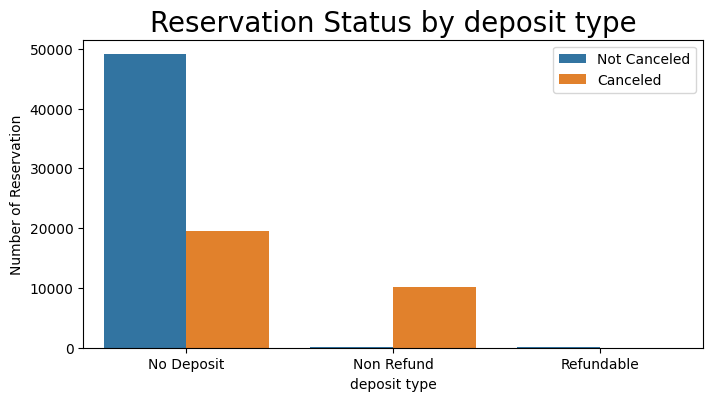

In [ ]:
# #5. Cancel rate by deposit type
plt.figure(figsize = (8,4))
ax1=sns.countplot(x ='deposit_type', hue = 'is_canceled',data = df)
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status by deposit type', size = 20)
plt.xlabel('deposit type')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceled'])
plt.show()

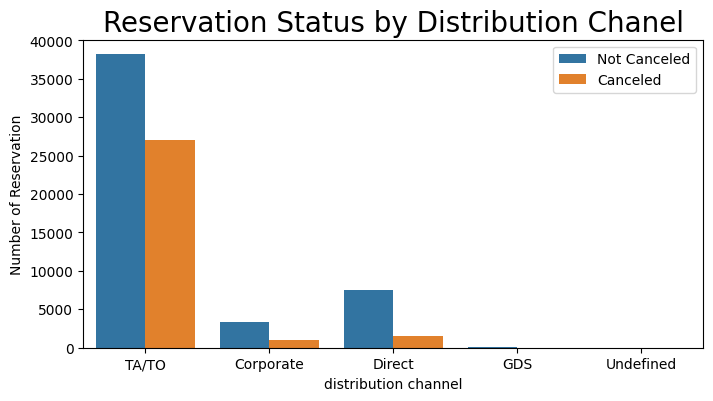

In [ ]:
#4. Cancel rate by distibution chanel
plt.figure(figsize = (8,4))
ax1=sns.countplot(x ='distribution_channel', hue = 'is_canceled',data = df)
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status by Distribution Chanel', size = 20)
plt.xlabel('distribution channel')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceled'])
plt.show()

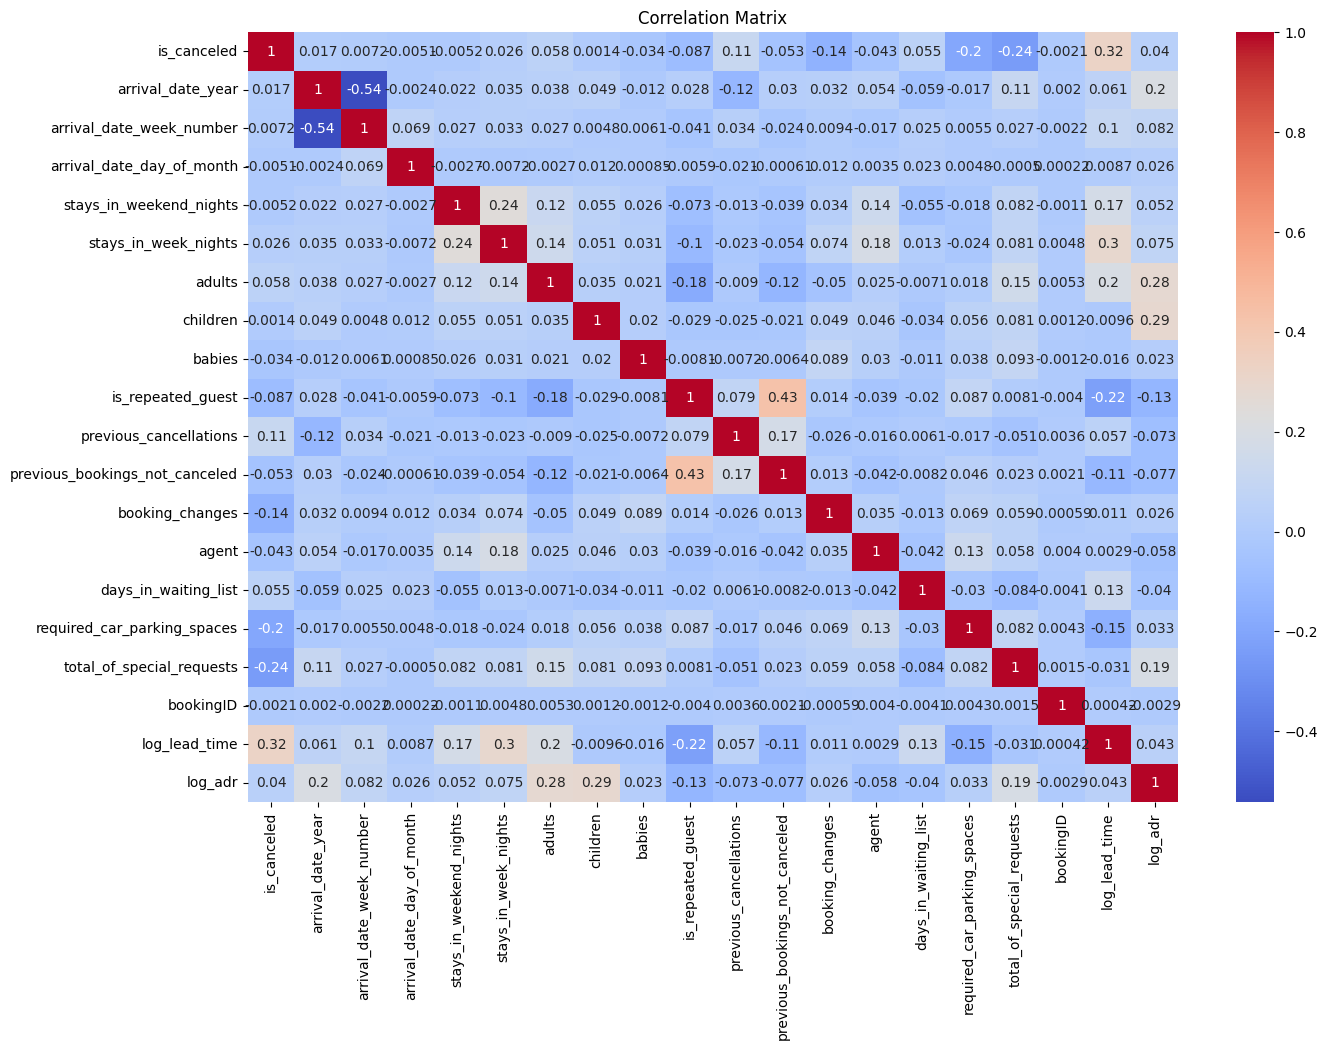

In [ ]:
#heatmap numeric colom
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

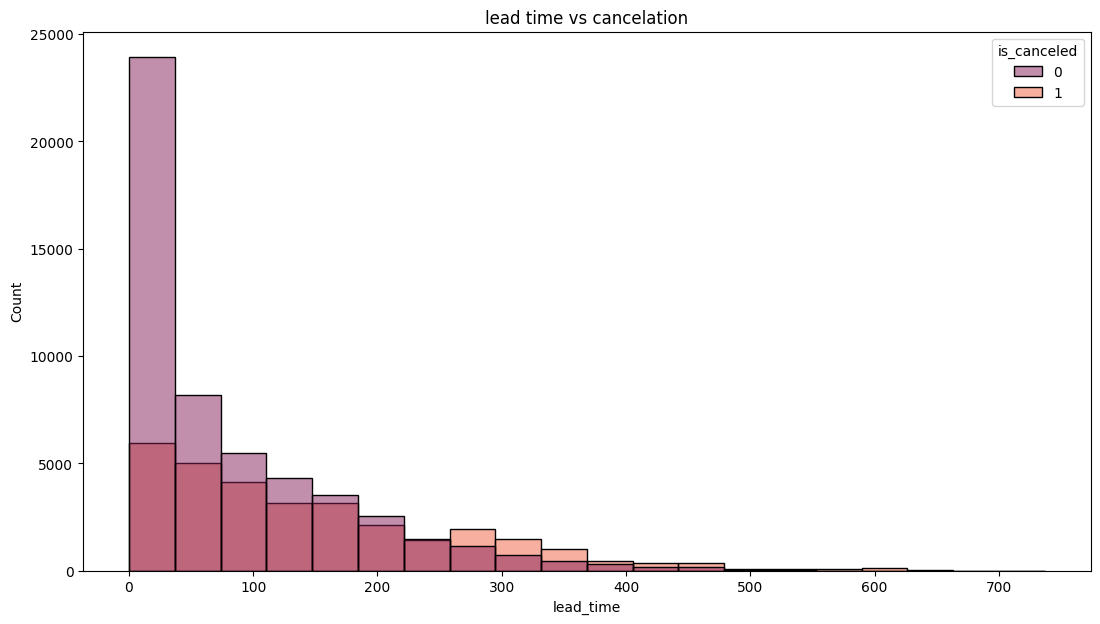

In [ ]:
#3. Lead time vs cancelation, data dengan outlier
fig, axes = plt.subplots(figsize=(13, 7))
sns.histplot(data = df_hotel,x = "lead_time",bins= 20,hue="is_canceled",ax=axes, palette='rocket')
plt.title('lead time vs cancelation')
plt.show()
plt.show()

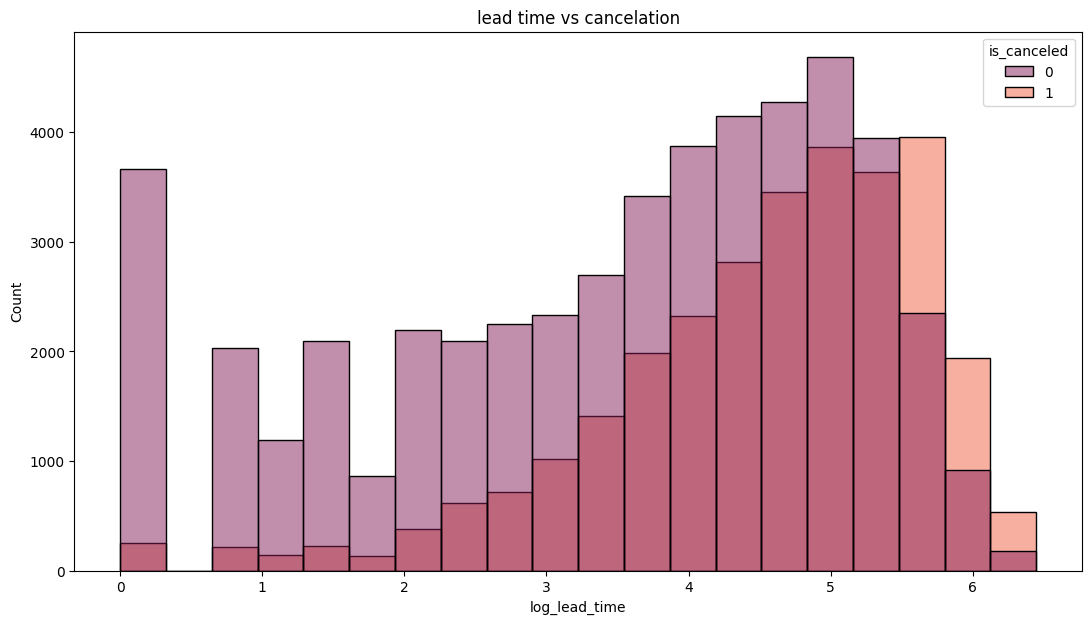

In [ ]:
#3. Lead time vs cancelation
fig, axes = plt.subplots(figsize=(13, 7))
sns.histplot(data = df,x = "log_lead_time",bins= 20,hue="is_canceled",ax=axes,palette='rocket')
plt.title('lead time vs cancelation')
plt.show()
plt.show()

# Feature Enginering

In [ ]:
#Feature Engineering
# Total malam menginap
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

#miss atch kamar yang dipesan
df["room_type_changed"] = (df["reserved_room_type"] != df["assigned_room_type"]).astype(int)

#total rate tamu
df['total_spent'] = df['log_adr'] * df['total_nights']

In [ ]:
#drop column bookingId,
df.drop(['bookingID','reservation_status'], axis=1, inplace=True)
# df.drop(['bookingID','arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month' , 'arrival_month_year'], axis=1, inplace=True)

In [ ]:
df.drop(['reservation_status_date'], axis=1, inplace=True)

df.drop(['lead_time_bin'], axis=1, inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,log_lead_time,log_adr,total_nights,room_type_changed,total_spent
0,"Crystal Cove, Barbados Barbados",0,2019,January,2,10,0,4,2,0,...,314.0,0,Transient,0,0,2.197225,3.673766,4,0,14.695063
1,"Greensboro Courtyard Greensboro, NC",1,2018,December,51,15,0,2,2,0,...,1.0,0,Transient,0,0,6.263398,4.155753,2,0,8.311506
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,2019,May,20,19,1,2,2,0,...,12.0,0,Transient,0,0,5.170484,4.709530,3,0,14.128591
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,2018,October,43,17,1,0,1,0,...,0.0,0,Transient,0,0,0.000000,3.828641,1,0,3.828641
4,"W New York – Union Square New York, NY",1,2017,September,39,26,2,3,2,0,...,16.0,0,Transient,0,1,3.526361,4.076181,5,0,20.380903


In [ ]:
#encoding categorical column
df_cat_col = df.select_dtypes(include='object')
df_cat_col.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,"Crystal Cove, Barbados Barbados",January,BB,ITA,Online TA,TA/TO,A,A,No Deposit,Transient
1,"Greensboro Courtyard Greensboro, NC",December,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",May,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient
3,Courtyard by Marriott Aberdeen Airport Aberdee...,October,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient
4,"W New York – Union Square New York, NY",September,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient


In [ ]:
# onehot encoding kolom kategori
df_encoded = pd.get_dummies(df, columns=['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type',])
df_encoded.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,"Crystal Cove, Barbados Barbados",0,2019,January,2,10,0,4,2,0,...,False,True,False,True,False,False,False,False,True,False
1,"Greensboro Courtyard Greensboro, NC",1,2018,December,51,15,0,2,2,0,...,False,True,False,False,True,False,False,False,True,False
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,2019,May,20,19,1,2,2,0,...,False,True,False,False,True,False,False,False,True,False
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,2018,October,43,17,1,0,1,0,...,False,False,False,True,False,False,False,False,True,False
4,"W New York – Union Square New York, NY",1,2017,September,39,26,2,3,2,0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
#output encoding boolean type, rubah jadi int
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [ ]:
#frequency encoding (hotel &country)
df_encoded['hotel'] = df_encoded['hotel'].map(df_encoded['hotel'].value_counts())
df_encoded['country'] = df_encoded['country'].map(df_encoded['country'].value_counts())

In [ ]:
df_encoded.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1277,0,2019,January,2,10,0,4,2,0,...,0,1,0,1,0,0,0,0,1,0
1,1210,1,2018,December,51,15,0,2,2,0,...,0,1,0,0,1,0,0,0,1,0
2,1231,1,2019,May,20,19,1,2,2,0,...,0,1,0,0,1,0,0,0,1,0
3,1194,0,2018,October,43,17,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1192,1,2017,September,39,26,2,3,2,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in [' ]:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# #drop reservasion ststaus , not relevant
# df_encoded.drop(['reservation_status_date'], axis=1, inplace=True)

# Data Preprocessing

## Split Data train-test

In [ ]:
X = df_encoded.drop(columns=['is_canceled'])
y = df_encoded['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=1000
)

In [ ]:
df_encoded.dtypes

,0
hotel,int64
is_canceled,int64
arrival_date_year,int64
arrival_date_month,int64
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,int64


In [ ]:
df_encoded.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1277,0,2019,4,2,10,0,4,2,0,...,0,1,0,1,0,0,0,0,1,0
1,1210,1,2018,2,51,15,0,2,2,0,...,0,1,0,0,1,0,0,0,1,0
2,1231,1,2019,8,20,19,1,2,2,0,...,0,1,0,0,1,0,0,0,1,0
3,1194,0,2018,10,43,17,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1192,1,2017,11,39,26,2,3,2,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df_encoded.dtypes.value_counts()


,count
int64,47
float64,4


In [ ]:
#split ulang data
X = df_encoded.drop(columns=['is_canceled'])
y = df_encoded['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=1000
)

In [ ]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Jadikan DataFrame lagi
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# SMOTE data train
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1000)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
# SMOTE,kembali ke DataFrame
X_train_sm = pd.DataFrame(X_train_sm, columns=X_train.columns)



# Model


In [ ]:
y_train_sm.value_counts(normalize=True)

,proportion
is_canceled,
0,0.5
1,0.5


## Define Model

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(random_state=1000, solver='liblinear')

In [ ]:
# Hypertruning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500]
}

log_randomcv = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=10,               # Try 10 random combinations. Adjust as needed.
    cv=5,
    scoring='recall',        # Still focuses on recall for churn prediction.
    n_jobs=-1,
    random_state=42
)

**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(random_state=1000)

In [ ]:
# Hyperturning


param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 10, 12, 15]
}
 #note: we use recall
rf_clf_randomcv = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=10,             # Try 5 random combinations, adjust if needed
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)


**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(random_state=1000)

In [ ]:
import xgboost
print(xgboost.__version__)

2.1.4


In [ ]:
# Parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# RandomizedSearchCV
xgb_randomcv = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,          # Sample 10 random combinations
    cv=5,
    scoring='recall',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

## Train Model

In [ ]:
# log_gridcv.fit(X_train_sm, y_train_sm)
log_randomcv.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(random_state=1000,
                                                solver='liblinear'),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='recall')

**Random Forest**

In [ ]:
rf_clf_randomcv.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 10, 12, 15],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='recall')

**XGBoost**

In [ ]:
xgb_randomcv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1000, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=1)

## Pred- Data Train

In [ ]:
#Log-Regression prediction data train
log_pred_train = log_randomcv.predict(X_train_sm)
log_pred_proba = log_randomcv.predict_proba(X_train_sm)


In [ ]:
# random forest prediction data train
rf_pred_train = rf_clf_randomcv.predict(X_train_sm)
rf_pred_proba = rf_clf_randomcv.predict_proba(X_train_sm)


In [ ]:
# XGBoost prediction
xgb_pred_train = xgb_randomcv.predict(X_train_sm)
xgb_pred_proba = xgb_randomcv.predict_proba(X_train_sm)

## Pred- Data Test


In [ ]:
#Log-Regression prediction
log_pred = log_randomcv.predict(X_test)
log_pred_proba = log_randomcv.predict_proba(X_test)

In [ ]:
# random forest prediction
rf_pred = rf_clf_randomcv.predict(X_test)
rf_pred_proba = rf_clf_randomcv.predict_proba(X_test)


In [ ]:
# XGBoost prediction
xgb_pred = xgb_randomcv.predict(X_test)
xgb_pred_proba = xgb_randomcv.predict_proba(X_test)

## Model Evaluation


### data train evaluation

In [ ]:
pd.DataFrame(metrics.classification_report(y_train_sm, log_pred_train, target_names=['Not cancel','Cancel'], output_dict=True))

,Not cancel,Cancel,accuracy,macro avg,weighted avg
precision,0.808229,0.819129,0.813584,0.813679,0.813679
recall,0.822271,0.804897,0.813584,0.813584,0.813584
f1-score,0.815190,0.811951,0.813584,0.813570,0.813570
support,39369.000000,39369.000000,0.813584,78738.000000,78738.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_train_sm, rf_pred_train, target_names=['Not cancel','Cancel'], output_dict=True))

,Not cancel,Cancel,accuracy,macro avg,weighted avg
precision,0.912022,0.900160,0.906005,0.906091,0.906091
recall,0.898702,0.913307,0.906005,0.906005,0.906005
f1-score,0.905313,0.906686,0.906005,0.906000,0.906000
support,39369.000000,39369.000000,0.906005,78738.000000,78738.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_train_sm, xgb_pred_train, target_names=['Not cancel','Cancel'], output_dict=True))

,Not cancel,Cancel,accuracy,macro avg,weighted avg
precision,0.885958,0.891727,0.888821,0.888843,0.888843
recall,0.892530,0.885113,0.888821,0.888821,0.888821
f1-score,0.889232,0.888407,0.888821,0.888820,0.888820
support,39369.000000,39369.000000,0.888821,78738.000000,78738.000000


### Data test evaluation

**Logistic Regression**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

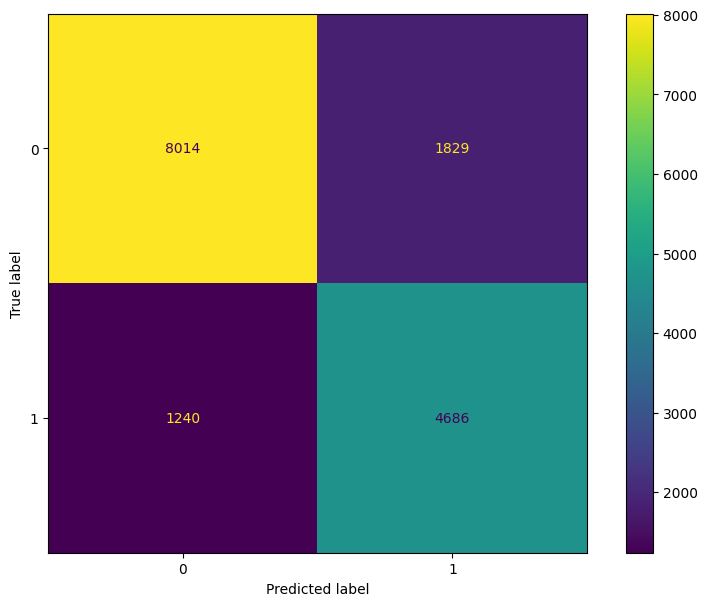

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = log_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=log_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, log_pred, target_names=['Not Cancel','Cancel'], output_dict=True))

,Not Cancel,Cancel,accuracy,macro avg,weighted avg
precision,0.866004,0.719263,0.805378,0.792634,0.810859
recall,0.814183,0.790753,0.805378,0.802468,0.805378
f1-score,0.839294,0.753316,0.805378,0.796305,0.806983
support,9843.000000,5926.000000,0.805378,15769.000000,15769.000000


**Random Forest**

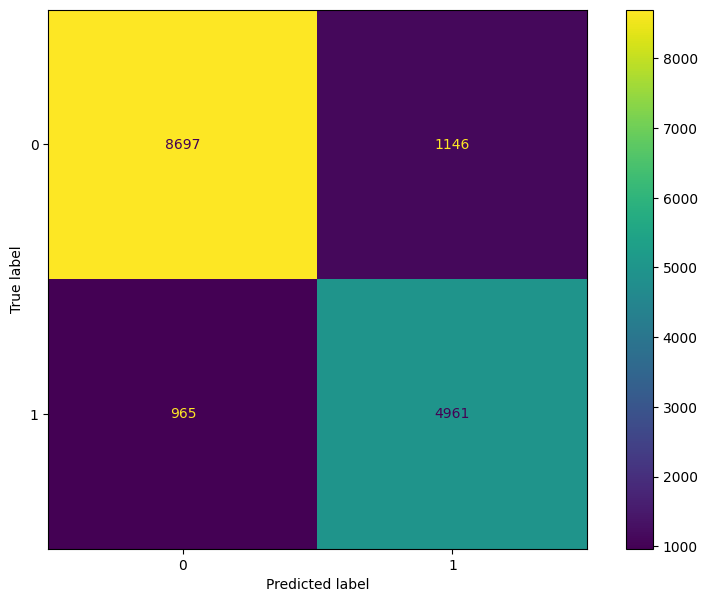

In [ ]:
#Confusion matrix


fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()


In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Cancel','Cancel'], output_dict=True))

,Not Cancel,Cancel,accuracy,macro avg,weighted avg
precision,0.900124,0.812346,0.86613,0.856235,0.867137
recall,0.883572,0.837158,0.86613,0.860365,0.866130
f1-score,0.891771,0.824566,0.86613,0.858169,0.866515
support,9843.000000,5926.000000,0.86613,15769.000000,15769.000000


**XGBoost**

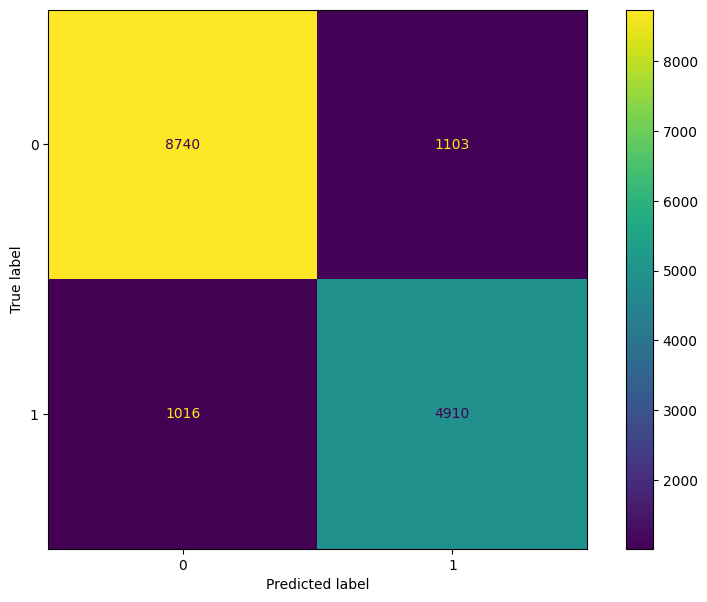

In [ ]:
# confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = xgb_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=xgb_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_randomcv.best_estimator_.classes_)
  # Plot confusion matrix
disp.plot(ax=ax)
plt.show()




In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Cancel','Cancel'], output_dict=True))

,Not Cancel,Cancel,accuracy,macro avg,weighted avg
precision,0.895859,0.816564,0.865622,0.856212,0.866060
recall,0.887941,0.828552,0.865622,0.858246,0.865622
f1-score,0.891882,0.822514,0.865622,0.857198,0.865814
support,9843.000000,5926.000000,0.865622,15769.000000,15769.000000


In [ ]:
df.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,log_lead_time,log_adr,total_nights,room_type_changed,total_spent
0,"Crystal Cove, Barbados Barbados",0,2019,January,2,10,0,4,2,0,...,314.0,0,Transient,0,0,2.197225,3.673766,4,0,14.695063
1,"Greensboro Courtyard Greensboro, NC",1,2018,December,51,15,0,2,2,0,...,1.0,0,Transient,0,0,6.263398,4.155753,2,0,8.311506
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,2019,May,20,19,1,2,2,0,...,12.0,0,Transient,0,0,5.170484,4.709530,3,0,14.128591
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,2018,October,43,17,1,0,1,0,...,0.0,0,Transient,0,0,0.000000,3.828641,1,0,3.828641
4,"W New York – Union Square New York, NY",1,2017,September,39,26,2,3,2,0,...,16.0,0,Transient,0,1,3.526361,4.076181,5,0,20.380903


## Feature importance

In [ ]:
## initiate explainer for Logistic regression
churn_Log_exp = dx.Explainer(log_randomcv, X_train_sm, y_train_sm, label = "Log-Reg Interpretation")
## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(rf_clf_randomcv, X_train_sm, y_train_sm, label = "RF Interpretation")
## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_randomcv, X_train_sm, y_train_sm, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 78738 rows 50 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 78738 values
  -> model_class       : sklearn.model_selection._search.RandomizedSearchCV (default)
  -> label             : Log-Reg Interpretation
  -> predict function  : <function yhat_proba_default at 0x79039ba33420> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.43e-31, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.000137, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 78738 rows 50 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Con

In [ ]:
# visualizr permutation feature importance for Logistic Regression Model
churn_Log_exp.model_parts().plot()

In [ ]:
# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

In [ ]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

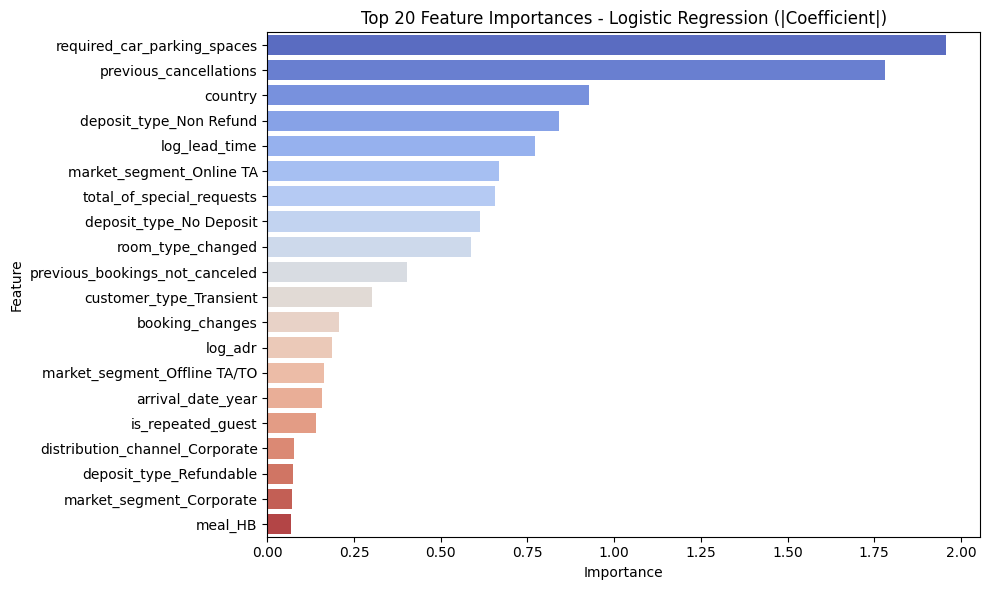

In [ ]:
log_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(log_randomcv.best_estimator_.coef_[0])  # hanya satu kelas untuk binary classification
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=log_coef.head(20), y='Feature', x='Importance', palette='coolwarm')
plt.title('Top 20 Feature Importances - Logistic Regression (|Coefficient|)')
plt.tight_layout()
plt.show()

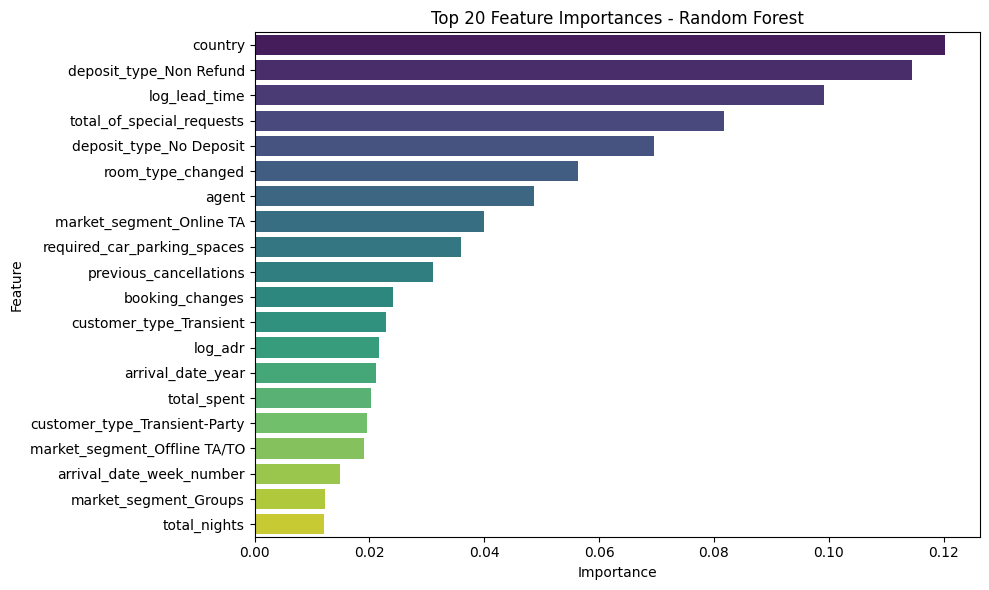

In [ ]:
# Feature importance dari model RF
rf_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_clf_randomcv.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feat_imp.head(20), y='Feature', x='Importance', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()